In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.base import get_data_home
from keras.metrics import categorical_accuracy
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_files 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

Using TensorFlow backend.


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1LL5SFYUh1teEAMgFjO6Y3aW9HMfPpOPa'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1LL5SFYUh1teEAMgFjO6Y3aW9HMfPpOPa


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Classic3.csv')  
df3 = pd.read_csv('Classic3.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
len(df3.data)

7095

In [0]:
#Definindo constantes
max_length = 100
num_labels = 4
vocab_size = 8000
batch_size = [100]
epochs = [10]

In [0]:
# Extract text
tokenizer = Tokenizer(num_words=vocab_size) # Setup tokenizer
tokenizer.fit_on_texts(df3.data)
sequences = tokenizer.texts_to_sequences(df3.data) # Generate sequences
x = pad_sequences(sequences, maxlen=max_length)
# Extract target
y = to_categorical(df3.target, num_labels)

In [0]:
print('Shape of data:', x.shape)
print('Shape of labels:', y.shape)

Shape of data: (7095, 100)
Shape of labels: (7095, 4)


In [0]:
#Training and Test Sets 
#this script divides data into 20% test set and 80% training set.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [0]:
link = 'https://drive.google.com/open?id=1erGe6LcwCDxpL9D8rRO7UYg0POVBvwX8'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1erGe6LcwCDxpL9D8rRO7UYg0POVBvwX8


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('glove.6B.100d.txt') 

In [0]:
embeddings_index = {} # We create a dictionary of word -> embedding

with open(os.path.join('glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0] # The first value is the word, the rest are the values of the embedding
        embedding = np.asarray(values[1:], dtype='float32') # Load embedding
        embeddings_index[word] = embedding # Add embedding to our embedding dictionary

print('Found {:,} word vectors in GloVe.'.format(len(embeddings_index)))

Found 400,000 word vectors in GloVe.


In [0]:
embedding_dim = 100 # We use 100 dimensional glove vectors

word_index = tokenizer.word_index
nb_words = min(vocab_size, len(word_index)) # How many words are there actually

embedding_matrix = np.zeros((nb_words, embedding_dim))

# The vectors need to be in the same position as their index. 
# Meaning a word with token 1 needs to be in the second row (rows start with zero) and so on

# Loop over all words in the word index
for word, i in word_index.items():
    # If we are above the amount of words we want to use we do nothing
    if i >= vocab_size: 
        continue
    # Get the embedding vector for the word
    embedding_vector = embeddings_index.get(word)
    # If there is an embedding vector, put it in the embedding matrix
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

In [0]:
# create model
model = Sequential()
model.add(Embedding(vocab_size, 
                    embedding_dim, 
                    input_length=max_length, 
                    weights = [embedding_matrix], 
                    trainable = False))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          800000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 128)           38528     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 128)           49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 128)            49280     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 128)     

In [0]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[categorical_accuracy])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5676 samples, validate on 1419 samples
Epoch 1/10
5676/5676 [==============================] - 6s 971us/step - loss: 0.5280 - acc: 0.8069 - val_loss: 0.3498 - val_acc: 0.8781
Epoch 2/10
5676/5676 [==============================] - 2s 285us/step - loss: 0.1595 - acc: 0.9466 - val_loss: 0.2255 - val_acc: 0.9387
Epoch 3/10
5676/5676 [==============================] - 2s 308us/step - loss: 0.1108 - acc: 0.9609 - val_loss: 0.2136 - val_acc: 0.9352
Epoch 4/10
5676/5676 [==============================] - 2s 317us/step - loss: 0.0707 - acc: 0.9766 - val_loss: 0.2227 - val_acc: 0.9309
Epoch 5/10
5676/5676 [==============================] - 2s 320us/step - loss: 0.0492 - acc: 0.9848 - val_loss: 0.2417 - val_acc: 0.9352
Epoch 6/10
5676/5676 [==============================] - 2s 307us/step - loss: 0.0360 - acc: 0.9882 - val_loss: 0.1978 - val_acc: 0.9556
Epoch 7/10
5676/5676 [===================

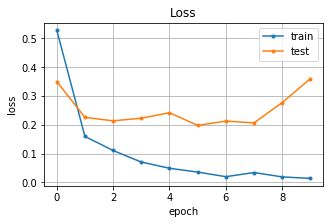

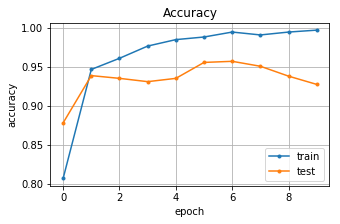

In [0]:
plt.figure(figsize =(5,3))
plt.plot(history.history['loss'], marker='.', label='train')
plt.plot(history.history['val_loss'], marker='.', label='test')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(history.history['acc'], marker='.', label='train')
plt.plot(history.history['val_acc'], marker='.', label='test')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# Keras with GridSearchCv

In [0]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length, 
                        weights = [embedding_matrix], 
                        trainable = False))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_labels, activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [0]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=100, verbose=0)

In [0]:

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, verbose=True,return_train_score=True)
grid_result = grid.fit(x, y)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  8.8min finished


In [0]:
df = pd.DataFrame(grid_result.cv_results_)
df.to_csv('resultado_pipeline_classic3.csv')
print(df.to_csv())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,12.238749933242797,1.4046777262346353,0.22460544109344482,0.041069251261806994,SGD,{'optimizer': 'SGD'},0.8024647899076972,0.7732394320864073,0.8612676103350142,0.8799295727635773,0.89154928838703,0.8709449960583524,0.7898448648506563,0.8356840577717393,0.8674188984297899,0.8748236947570769,0.8447145876370323,0.03975858440434709,7,0.8037196616222827,0.7783868397785147,0.8572827053891557,0.8792090792626073,0.9048942808724048,0.8626683428673546,0.795294403955177,0

In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981149 using {'optimizer': 'Adagrad'}
0.844715 (0.039759) with: {'optimizer': 'SGD'}
0.977590 (0.009046) with: {'optimizer': 'RMSprop'}
0.981149 (0.001158) with: {'optimizer': 'Adagrad'}
0.976991 (0.003731) with: {'optimizer': 'Adadelta'}
0.979598 (0.002785) with: {'optimizer': 'Adam'}
0.978894 (0.002997) with: {'optimizer': 'Adamax'}
0.977167 (0.009809) with: {'optimizer': 'Nadam'}
